1.CNN MODELİ-ALEXNET İLE ÇÖZÜMÜ

In [ ]:
import numpy as np # matrissel işlemler yapmak için bu kütüphaneyi çağırdım.
import os # bir takım dosya okuma işlemleri için veya dosyalardan ilgili sınıfların sample sayısını hesaplatmak için bu kütüphaneyi çağırdım.
import random # random işlemler yapmak için bu kütüphaneyi çağırdım.
import matplotlib.pyplot as plt #Veriye ait grafik çizdirmek için bu kütüphaneyi çağırdım.


from keras.models import Sequential # Modeli sequential yani sıralı hale getirmek  veya stack haline getirmek için bu kütüphaneyi çağırdım.
from keras.layers.core import Dense, Flatten, Dropout # Modelin overfitting olmasını önlemek ve model katmanlarını tanımlamak için çağrılan kütüphane
from keras.layers import Conv2D,MaxPooling2D, ZeroPadding2D # modele ait konvolüsyon ağı oluşturmak,overfitting i engellemek,katman hacmini düşürmek için tanımlanan kütüphane
from keras.preprocessing.image import ImageDataGenerator # Veri setinde train verisinden yüzde 10 nunu validasyon verisine ayırmak ve ölçekleme yapmak için tanımlanan kütüphane

from keras.utils import np_utils # karmaşıklık matrisinin grafiği için tanımlanan kütüphane
import itertools #karmaşık yineleyiciler üretmek için kullanılan kütüphane


In [ ]:
from google.colab import drive #drive ile bağlantı kurmak için tanımlanan kütüphane.
drive.mount("/content/drive") # drive a bağlanmak için onay kodu alındı.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainPath="./drive/MyDrive/veri_seti_final/train/" # chest xray veya diğer adıyla final_veri_setinden train verisetinin url si verildi.
testPath="./drive/MyDrive/veri_seti_final/test/" # chest xray veya diğer adıyla final_veri_setinden test verisetinin url si verildi.

In [ ]:
trainDataGen=ImageDataGenerator( # veriyi düzenleme işlemi yapıldı
    rescale=1./255, # veri ölçekleme işlemi yapıldı
    validation_split=0.1 # train verisinden yüzde 10 luk kısmı validasyon olarak ayarlandı.
)

testDataGen=ImageDataGenerator(rescale=1./255) # test veri seti yeniden ölçeklendi.
trainGen=trainDataGen.flow_from_directory( 
    trainPath,
    target_size=(227,227), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='training' #subset olarak training verisi olarak belirledim.
)

valGen=trainDataGen.flow_from_directory( # valgen için veri düzenlemesi yapıldı.
    trainPath, # valgen in train verisinden bilgi alacağı belirtildi.
    target_size=(227,227), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='validation') #subset olarak training verisi olarak belirledim.

testGen=testDataGen.flow_from_directory(
    testPath,  # testGen in test verisinden bilgi alacağı belirtildi.
    target_size=(227,227), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=1) #yığın boyutunu 1 olarak ayarladım.


Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/train/normal") # train verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/train/bakteriyel_pneumonia") # train verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel) # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/train/viral_pneumonia") # train verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral)  # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral)  # ekrana viral(virüs) sample sayısını yazdırdım.
print("-----------------")
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/test/normal") # test verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/test/bakteriyel_pneumonia") # test verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel)  # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/test/viral_pneumonia") # test verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral) # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral) # ekrana viral(virüs) sample sayısını yazdırdım.


TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 1349
TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 2538
TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 1345
-----------------
TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 234
TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 242
TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 148


In [ ]:
alexnet=Sequential() #evrişimli sinir ağlarını alexnet modeli üzerinde  birer stack yapısı gibi üst üste ekleme işlemi yapıyor.
alexnet.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation='relu',input_shape=(227,227,3))) # 1.konvolüsyon ağı belirlendi
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # katman hacmi düşürülmesi için max pooling işlemi yaptım ve kaydırma miktarını 2 olarak belirledim.
alexnet.add(ZeroPadding2D((2,2))) #2x2 lik zero padding işlemi yapıldı.
alexnet.add(Conv2D(256,kernel_size=(5,5),activation='relu',strides=(1,1))) # 2.konvolüsyon ağı belirlendi
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # katman hacmi düşürülmesi için max pooling işlemi yaptım ve kaydırma miktarını 2 olarak belirledim.
alexnet.add(ZeroPadding2D((1,1))) #1x1 lik zero padding işlemi yapıldı.
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1))) # 3.konvolüsyon ağı belirlendi.
alexnet.add(ZeroPadding2D((1,1))) #1x1 lik zero padding işlemi yapıldı.
alexnet.add(Conv2D(384,kernel_size=(3,3),activation='relu',strides=(1,1))) # 4.konvolüsyon ağı belirlendi.
alexnet.add(ZeroPadding2D((1,1))) #1x1 lik zero padding işlemi yapıldı.
alexnet.add(Conv2D(256,kernel_size=(3,3),activation='relu',strides=(1,1))) # 5.konvolüsyon ağı belirlendi.
alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2))) # katman hacmi düşürülmesi için max pooling işlemi yaptım ve kaydırma miktarını 2 olarak belirledim.
alexnet.add(Flatten()) # katmanlar düzleştirildi
alexnet.add(Dense(4096,activation='relu')) # 1.FC(FULL CONNECTED ) ağı eklendi.
alexnet.add(Dense(2048,activation='relu')) # 2.FC(FULL CONNECTED ) ağı eklendi.
alexnet.add(Dense(3,activation='softmax')) # 3.FC(FULL CONNECTED ) ağı eklendi.
alexnet.summary() #MODELİN ÖZETİ GÖSTERİLDİ.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 31, 31, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      

In [ ]:
alexnet.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"]) # Alexnet modeli compile edildi. Yani derlendi

In [ ]:
history=alexnet.fit( # Train veri seti eğitime tabii tutuldu.
    trainGen,
    steps_per_epoch=trainGen.samples//32,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//32
)

Epoch 1/10
147/147 [==============================] - 59s 393ms/step - loss: 2.0809 - accuracy: 0.4873 - val_loss: 1.0141 - val_accuracy: 0.5332
Epoch 2/10
147/147 [==============================] - 56s 379ms/step - loss: 0.7943 - accuracy: 0.6511 - val_loss: 0.5697 - val_accuracy: 0.8027
Epoch 3/10
147/147 [==============================] - 56s 383ms/step - loss: 0.6179 - accuracy: 0.7273 - val_loss: 0.5860 - val_accuracy: 0.7832
Epoch 4/10
147/147 [==============================] - 56s 383ms/step - loss: 0.5300 - accuracy: 0.7707 - val_loss: 0.5209 - val_accuracy: 0.7910
Epoch 5/10
147/147 [==============================] - 57s 386ms/step - loss: 0.5228 - accuracy: 0.7715 - val_loss: 0.4493 - val_accuracy: 0.8359
Epoch 6/10
147/147 [==============================] - 57s 385ms/step - loss: 0.4580 - accuracy: 0.8016 - val_loss: 0.4503 - val_accuracy: 0.8418
Epoch 7/10
147/147 [==============================] - 57s 386ms/step - loss: 0.4511 - accuracy: 0.8055 - val_loss: 0.4789 - val_ac

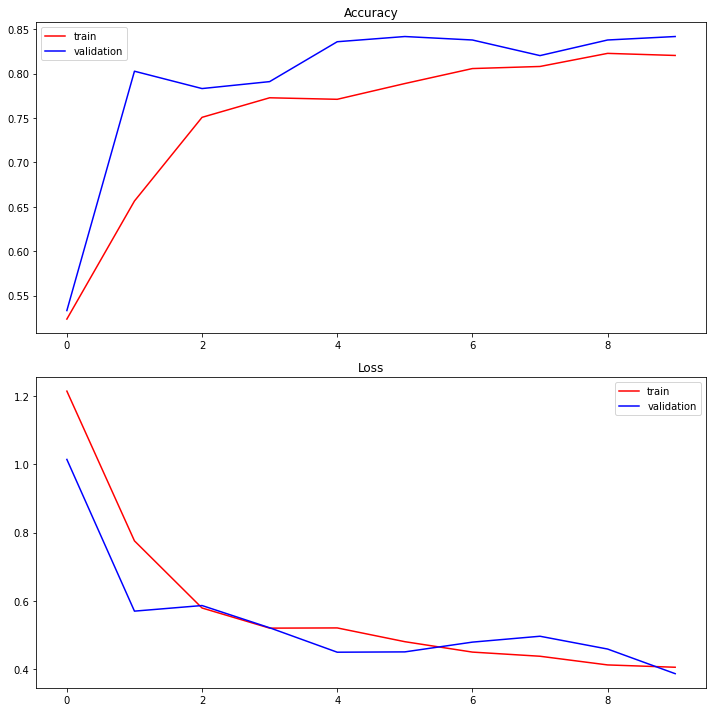

In [ ]:
plt.figure(figsize=(10,10)) # train accuracy ve validation accuracy ile train loss ve validation loss  grafiği çizdirildi.
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("TEST:") # model test verisiyle test edildi.
score=alexnet.evaluate(testGen)
print("Test Loss",score[0])
print("Test Accuracy",score[1]*100)

TEST:
624/624 [==============================] - 8s 12ms/step - loss: 1.2533 - accuracy: 0.7131
Test Loss 1.2532739639282227
Test Accuracy 71.31410241127014


In [ ]:
def plot_confusion_matrix1(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues): # confusion matris işlemleri yapıldı.

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    if normalize:

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


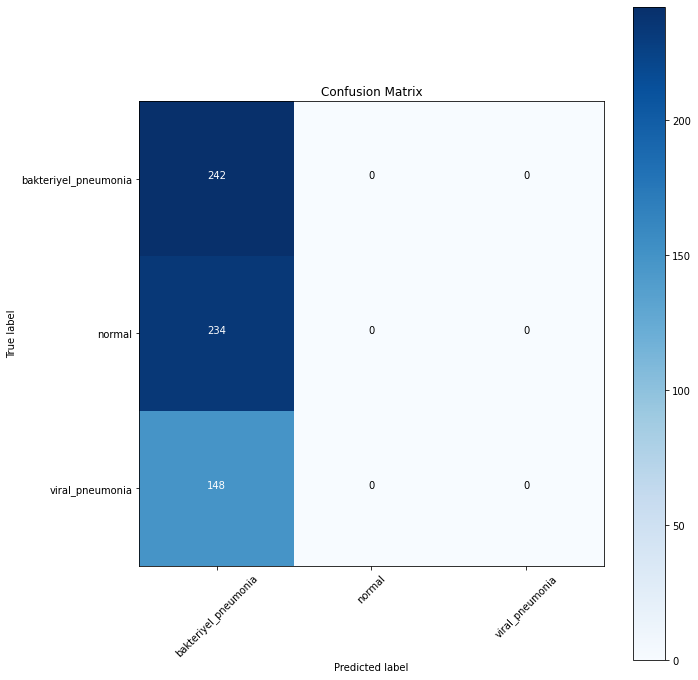

In [ ]:
target_names = [] # karmaşıklık matrisi oluşturuldu.

for key in trainGen.class_indices:

    target_names.append(key)

Y_pred = alexnet.predict_generator(testGen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(testGen.classes, y_pred)

plot_confusion_matrix1(cm, target_names, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion = confusion_matrix(testGen.classes, y_pred)
print('Confusion Matrix\n')
print(confusion)


print('Classification Report') # accuracy ,f1 score , recall vb değerler hesaplandı.
target_names = ['bakteriyel_pneumonia', 'normal','viral_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Confusion Matrix

[[242   0   0]
 [234   0   0]
 [148   0   0]]
Classification Report
                      precision    recall  f1-score   support

bakteriyel_pneumonia       0.39      1.00      0.56       242
              normal       0.00      0.00      0.00       234
     viral_pneumonia       0.00      0.00      0.00       148

            accuracy                           0.39       624
           macro avg       0.13      0.33      0.19       624
        weighted avg       0.15      0.39      0.22       624



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.CNN MODELİ VGG16 İLE ÇÖZÜMÜ

In [ ]:
from keras.models import Sequential,Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
base_model=VGG16(input_shape=(224,224,3),include_top=False) # VGG16 ile ilgili işlemler yapıldı.
base_model.trainable=False

x=Flatten()(base_model.output)
x=Dense(1024,activation='relu')(x)
out=Dense(3,activation='softmax')(x)
model=Model(inputs=base_model.inputs,outputs=out)

model.summary()
print(len(model.layers))
for layer in model.layers:
  print(layer.name," ",layer.trainable)

for layer in model.layers[:10]:
  layer.trainable=False

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainPath="./drive/MyDrive/veri_seti_final/train/" # chest xray veya diğer adıyla final_veri_setinden train verisetinin url si verildi.
testPath="./drive/MyDrive/veri_seti_final/test/" # chest xray veya diğer adıyla final_veri_setinden test verisetinin url si verildi.

In [ ]:
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/train/normal") # train verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/train/bakteriyel_pneumonia") # train verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel) # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/train/viral_pneumonia") # train verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral)  # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral)  # ekrana viral(virüs) sample sayısını yazdırdım.
print("-----------------")
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/test/normal") # test verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/test/bakteriyel_pneumonia") # test verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel)  # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/test/viral_pneumonia") # test verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral) # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral) # ekrana viral(virüs) sample sayısını yazdırdım.

TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 1349
TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 2538
TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 1345
-----------------
TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 234
TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 242
TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 148


In [ ]:
trainDataGen=ImageDataGenerator( # veriyi düzenleme işlemi yapıldı
    rescale=1./255, # veri ölçekleme işlemi yapıldı
    validation_split=0.1 # train verisinden yüzde 10 luk kısmı validasyon olarak ayarlandı.
)

testDataGen=ImageDataGenerator(rescale=1./255) # test veri seti yeniden ölçeklendi.
trainGen=trainDataGen.flow_from_directory( 
    trainPath,
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='training' #subset olarak training verisi olarak belirledim.
)

valGen=trainDataGen.flow_from_directory( # valgen için veri düzenlemesi yapıldı.
    trainPath, # valgen in train verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='validation') #subset olarak training verisi olarak belirledim.

testGen=testDataGen.flow_from_directory(
    testPath,  # testGen in test verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=1) #yığın boyutunu 1 olarak ayarladım.

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//32,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//32
)

Epoch 1/10
147/147 [==============================] - 61s 407ms/step - loss: 3.1844 - accuracy: 0.6246 - val_loss: 0.4276 - val_accuracy: 0.8516
Epoch 2/10
147/147 [==============================] - 59s 399ms/step - loss: 0.4135 - accuracy: 0.8161 - val_loss: 0.3608 - val_accuracy: 0.8457
Epoch 3/10
147/147 [==============================] - 59s 399ms/step - loss: 0.3871 - accuracy: 0.8267 - val_loss: 0.3730 - val_accuracy: 0.8145
Epoch 4/10
147/147 [==============================] - 59s 400ms/step - loss: 0.3651 - accuracy: 0.8420 - val_loss: 0.2981 - val_accuracy: 0.8848
Epoch 5/10
147/147 [==============================] - 59s 399ms/step - loss: 0.2885 - accuracy: 0.8710 - val_loss: 0.3616 - val_accuracy: 0.8574
Epoch 6/10
147/147 [==============================] - 59s 402ms/step - loss: 0.2822 - accuracy: 0.8748 - val_loss: 0.2907 - val_accuracy: 0.8887
Epoch 7/10
147/147 [==============================] - 59s 402ms/step - loss: 0.2529 - accuracy: 0.8897 - val_loss: 0.3238 - val_ac

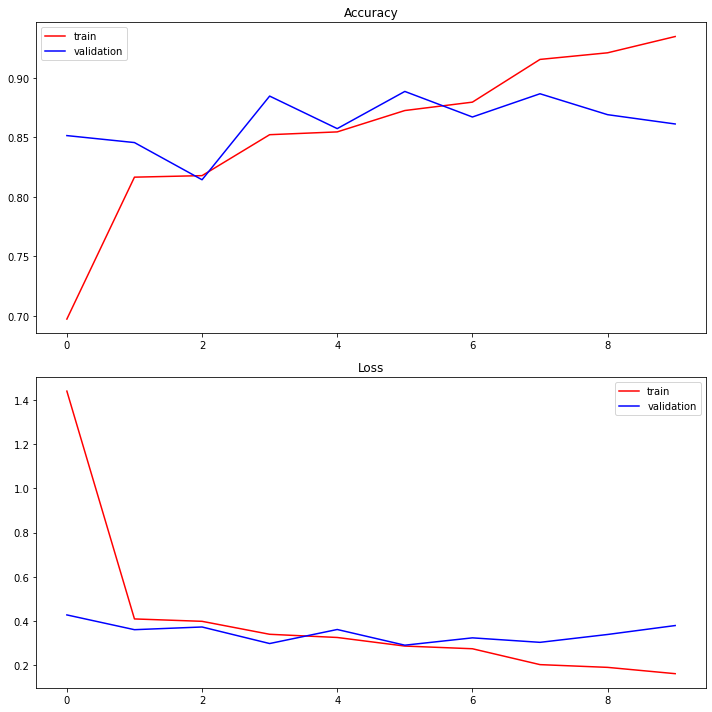

In [ ]:
plt.figure(figsize=(10,10)) # train accuracy ve validation accuracy ile train loss ve validation loss  grafiği çizdirildi.
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("TEST:") # model test verisiyle test edildi.
score=model.evaluate(testGen)
print("Test Loss",score[0])
print("Test Accuracy",score[1]*100)

TEST:
624/624 [==============================] - 9s 14ms/step - loss: 1.4542 - accuracy: 0.6731
Test Loss 1.4542244672775269
Test Accuracy 67.30769276618958


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues): # confusion matris işlemleri yapıldı.

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    if normalize:

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


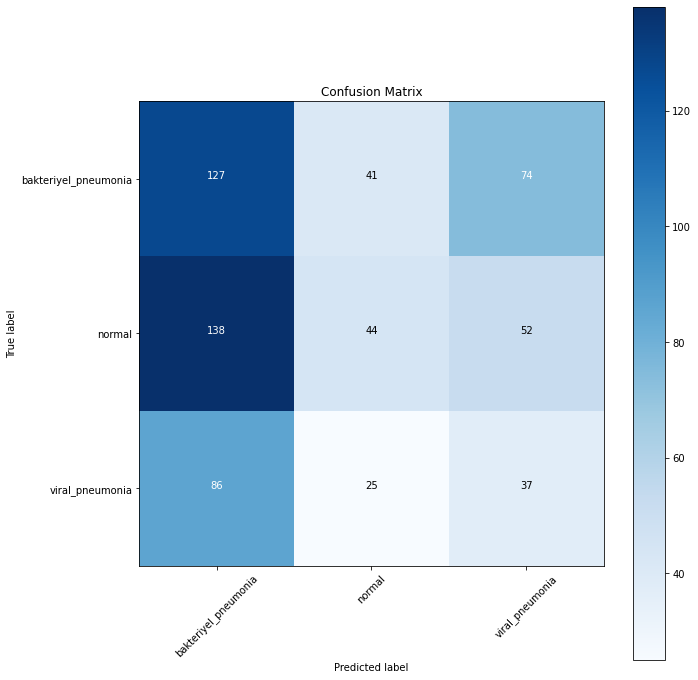

In [ ]:
target_names = [] # karmaşıklık matrisi oluşturuldu.

for key in trainGen.class_indices:

    target_names.append(key)

Y_pred = model.predict_generator(testGen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(testGen.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion = confusion_matrix(testGen.classes, y_pred)
print('Confusion Matrix\n')
print(confusion)


print('Classification Report') # accuracy ,f1 score , recall vb değerler hesaplandı.
target_names = ['bakteriyel_pneumonia', 'normal','viral_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Confusion Matrix

[[114  37  91]
 [111  29  94]
 [ 64  16  68]]
Classification Report
                      precision    recall  f1-score   support

bakteriyel_pneumonia       0.39      0.47      0.43       242
              normal       0.35      0.12      0.18       234
     viral_pneumonia       0.27      0.46      0.34       148

            accuracy                           0.34       624
           macro avg       0.34      0.35      0.32       624
        weighted avg       0.35      0.34      0.32       624



3.CNN MODELİ KENDİ TASARLAMIŞ OLDUĞUM MODEL İLE ÇÖZÜMÜ

In [ ]:
from keras.models import Sequential,Model
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D,Input
from keras.preprocessing.image import ImageDataGenerator
import os

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trainPath="./drive/MyDrive/veri_seti_final/train/" # chest xray veya diğer adıyla final_veri_setinden train verisetinin url si verildi.
testPath="./drive/MyDrive/veri_seti_final/test/" # chest xray veya diğer adıyla final_veri_setinden test verisetinin url si verildi.

In [ ]:
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/train/normal") # train verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/train/bakteriyel_pneumonia") # train verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel) # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/train/viral_pneumonia") # train verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral)  # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral)  # ekrana viral(virüs) sample sayısını yazdırdım.
print("-----------------")
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/test/normal") # test verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/test/bakteriyel_pneumonia") # test verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel)  # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/test/viral_pneumonia") # test verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral) # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral) # ekrana viral(virüs) sample sayısını yazdırdım.

TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 1349
TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 2538
TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 1345
-----------------
TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 234
TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 242
TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 148


In [ ]:
trainDataGen=ImageDataGenerator( # veriyi düzenleme işlemi yapıldı
    rescale=1./255, # veri ölçekleme işlemi yapıldı
    validation_split=0.1 # train verisinden yüzde 10 luk kısmı validasyon olarak ayarlandı.
)

testDataGen=ImageDataGenerator(rescale=1./255) # test veri seti yeniden ölçeklendi.
trainGen=trainDataGen.flow_from_directory( 
    trainPath,
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='training' #subset olarak training verisi olarak belirledim.
)

valGen=trainDataGen.flow_from_directory( # valgen için veri düzenlemesi yapıldı.
    trainPath, # valgen in train verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='validation') #subset olarak training verisi olarak belirledim.

testGen=testDataGen.flow_from_directory(
    testPath,  # testGen in test verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=1) #yığın boyutunu 1 olarak ayarladım.

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
    model = Sequential()
    model.add(Conv2D(80, (5,5), input_shape = (224,224,3), activation = "relu"))
    model.add(Conv2D(80, (5,5),  activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(40, (3,3), activation = "relu"))
    model.add(Conv2D(40, (3,3), activation = "relu"))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Flatten())
    model.add(Dense(512, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation ="softmax"))
    model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_388 (Conv2D)          (None, 220, 220, 80)      6080      
_________________________________________________________________
conv2d_389 (Conv2D)          (None, 216, 216, 80)      160080    
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 108, 108, 80)      0         
_________________________________________________________________
conv2d_390 (Conv2D)          (None, 106, 106, 40)      28840     
_________________________________________________________________
conv2d_391 (Conv2D)          (None, 104, 104, 40)      14440     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 52, 52, 40)        0         
_________________________________________________________________
flatten_29 (Flatten)         (None, 108160)           

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history=model.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//32,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//32
)

Epoch 1/10
147/147 [==============================] - 67s 445ms/step - loss: 1.8353 - accuracy: 0.5038 - val_loss: 0.8180 - val_accuracy: 0.6504
Epoch 2/10
147/147 [==============================] - 65s 441ms/step - loss: 0.7497 - accuracy: 0.6899 - val_loss: 0.5628 - val_accuracy: 0.7930
Epoch 3/10
147/147 [==============================] - 65s 442ms/step - loss: 0.5935 - accuracy: 0.7446 - val_loss: 0.4802 - val_accuracy: 0.8359
Epoch 4/10
147/147 [==============================] - 65s 440ms/step - loss: 0.5703 - accuracy: 0.7455 - val_loss: 0.4881 - val_accuracy: 0.8203
Epoch 5/10
147/147 [==============================] - 65s 442ms/step - loss: 0.6216 - accuracy: 0.7482 - val_loss: 0.4848 - val_accuracy: 0.8262
Epoch 6/10
147/147 [==============================] - 65s 442ms/step - loss: 0.5016 - accuracy: 0.7737 - val_loss: 0.4752 - val_accuracy: 0.8105
Epoch 7/10
147/147 [==============================] - 65s 441ms/step - loss: 0.4822 - accuracy: 0.7762 - val_loss: 0.4329 - val_ac

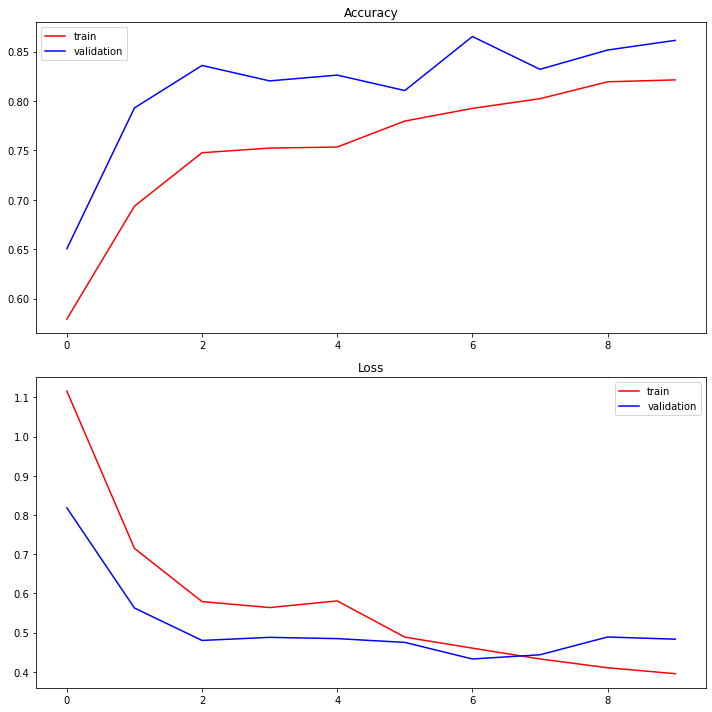

In [ ]:
plt.figure(figsize=(10,10)) # train accuracy ve validation accuracy ile train loss ve validation loss  grafiği çizdirildi.
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("TEST:") # model test verisiyle test edildi.
score=model.evaluate(testGen)
print("Test Loss",score[0])
print("Test Accuracy",score[1]*100)

TEST:
624/624 [==============================] - 8s 13ms/step - loss: 1.4836 - accuracy: 0.7115
Test Loss 1.4836492538452148
Test Accuracy 71.15384340286255


In [ ]:
def plot_confusion_matrix3(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues): # confusion matris işlemleri yapıldı.

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    if normalize:

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


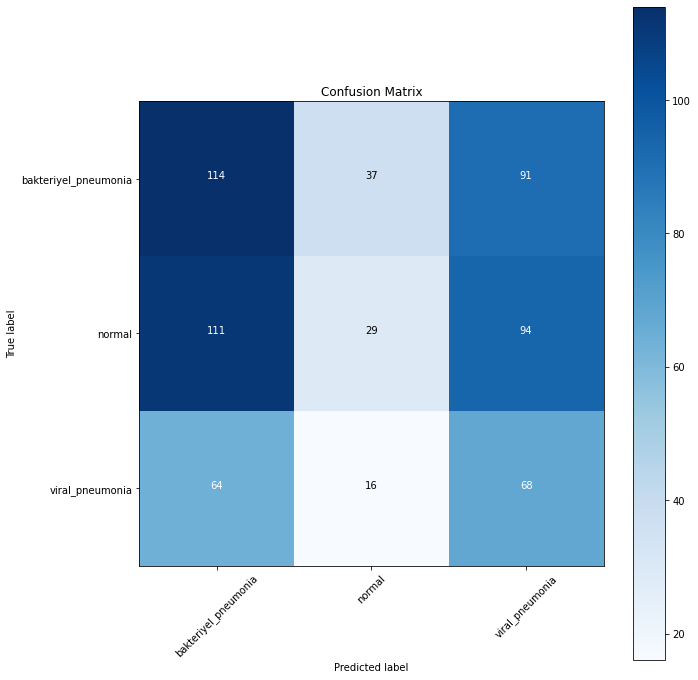

In [ ]:
target_names = [] # karmaşıklık matrisi oluşturuldu.

for key in trainGen.class_indices:

    target_names.append(key)

Y_pred = model.predict_generator(testGen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(testGen.classes, y_pred)

plot_confusion_matrix3(cm, target_names, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion = confusion_matrix(testGen.classes, y_pred)
print('Confusion Matrix\n')
print(confusion)


print('Classification Report') # accuracy ,f1 score , recall vb değerler hesaplandı.
target_names = ['bakteriyel_pneumonia', 'normal','viral_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Confusion Matrix

[[114  37  91]
 [111  29  94]
 [ 64  16  68]]
Classification Report
                      precision    recall  f1-score   support

bakteriyel_pneumonia       0.39      0.47      0.43       242
              normal       0.35      0.12      0.18       234
     viral_pneumonia       0.27      0.46      0.34       148

            accuracy                           0.34       624
           macro avg       0.34      0.35      0.32       624
        weighted avg       0.35      0.34      0.32       624



4.CNN MODELİ İNCEPTİON_V3 İLE ÇÖZÜMÜ

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization,Activation,Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
trainPath="./drive/MyDrive/veri_seti_final/train/" # chest xray veya diğer adıyla final_veri_setinden train verisetinin url si verildi.
testPath="./drive/MyDrive/veri_seti_final/test/" # chest xray veya diğer adıyla final_veri_setinden test verisetinin url si verildi.

In [ ]:
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/train/normal") # train verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/train/bakteriyel_pneumonia") # train verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel) # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/train/viral_pneumonia") # train verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral)  # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral)  # ekrana viral(virüs) sample sayısını yazdırdım.
print("-----------------")
list_normal = os.listdir("./drive/MyDrive/veri_seti_final/test/normal") # test verisindeki normal klasöründe bulunan sample sayısını buldurmak için url verdim.
normal = len(list_normal) # normal klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI:",normal) # ekrana normal sample sayısını yazdırdım.

list_bakteriyel = os.listdir("./drive/MyDrive/veri_seti_final/test/bakteriyel_pneumonia") # test verisindeki bakteriyel_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
bakteriyel = len(list_bakteriyel)  # bakteri klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI:",bakteriyel)  # ekrana bakteri sample sayısını yazdırdım.

list_viral = os.listdir("./drive/MyDrive/veri_seti_final/test/viral_pneumonia") # test verisindeki virüs veya viral_pneumonia klasöründe bulunan sample sayısını buldurmak için url verdim.
viral = len(list_viral) # viral(virüs) klasörünün toplam sample sayısını buldurdum.
print ("TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI:",viral) # ekrana viral(virüs) sample sayısını yazdırdım.

TRAİN DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 1349
TRAİN DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 2538
TRAİN DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 1345
-----------------
TEST DOSYASINDAKİ TOPLAM NORMAL SAMPLE SAYISI: 234
TEST DOSYASINDAKİ TOPLAM BAKTERİYEL PNEUMONIA SAMPLE SAYISI: 242
TEST DOSYASINDAKİ TOPLAM VİRAL PNEUMONIA SAMPLE SAYISI: 148


In [ ]:
trainDataGen=ImageDataGenerator( # veriyi düzenleme işlemi yapıldı
    rescale=1./255, # veri ölçekleme işlemi yapıldı
    validation_split=0.1 # train verisinden yüzde 10 luk kısmı validasyon olarak ayarlandı.
)

testDataGen=ImageDataGenerator(rescale=1./255) # test veri seti yeniden ölçeklendi.
trainGen=trainDataGen.flow_from_directory( 
    trainPath,
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='training' #subset olarak training verisi olarak belirledim.
)

valGen=trainDataGen.flow_from_directory( # valgen için veri düzenlemesi yapıldı.
    trainPath, # valgen in train verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=32, #yığın boyutunu 32 olarak ayarladım.
    subset='validation') #subset olarak training verisi olarak belirledim.

testGen=testDataGen.flow_from_directory(
    testPath,  # testGen in test verisinden bilgi alacağı belirtildi.
    target_size=(224,224), #veriyi okurken ölçeklendiriyor.
    color_mode='rgb', #renk modunu red green blue olarak ayarladım.
    class_mode='categorical', # sınıflandırma boyutunu kategori olarak belirledim.
    batch_size=1) #yığın boyutunu 1 olarak ayarladım.

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# temel önceden eğitilmiş modeli oluşturma
base_model = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))

# küresel bir uzamsal ortalama havuzlama katmanı ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
# tam bağlı bir katman eklendi
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
# ve bir lojistik katman -- diyelim ki 3 sınıfımız var
predictions = Dense(3, activation='softmax')(x)

# eğiteceğimiz model bu
model1 = Model(inputs=base_model.input, outputs=predictions)

# ilk: yalnızca üst katmanları eğitildi (rastgele başlatıldı)
# yani tüm evrişimli InceptionV3 katmanlarını dondur
for layer in base_model.layers:
    layer.trainable = False

model1.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_____________________________

In [ ]:
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"]) # modeli derleme (katmanları eğitilemez olarak ayarladıktan sonra  yapılmalıdır)

In [ ]:
history=model1.fit(
    trainGen,
    steps_per_epoch=trainGen.samples//32,
    validation_data=valGen,
    epochs=10,
    validation_steps=valGen.samples//32
)

Epoch 1/10
147/147 [==============================] - 1221s 8s/step - loss: 0.7665 - accuracy: 0.6843 - val_loss: 0.5701 - val_accuracy: 0.7812
Epoch 2/10
147/147 [==============================] - 502s 3s/step - loss: 0.5504 - accuracy: 0.7570 - val_loss: 0.5365 - val_accuracy: 0.7930
Epoch 3/10
147/147 [==============================] - 503s 3s/step - loss: 0.5227 - accuracy: 0.7638 - val_loss: 0.4477 - val_accuracy: 0.8379
Epoch 4/10
147/147 [==============================] - 503s 3s/step - loss: 0.4993 - accuracy: 0.7820 - val_loss: 0.4249 - val_accuracy: 0.8457
Epoch 5/10
147/147 [==============================] - 503s 3s/step - loss: 0.4844 - accuracy: 0.7859 - val_loss: 0.4312 - val_accuracy: 0.8203
Epoch 6/10
147/147 [==============================] - 503s 3s/step - loss: 0.4566 - accuracy: 0.8008 - val_loss: 0.4829 - val_accuracy: 0.8164
Epoch 7/10
147/147 [==============================] - 505s 3s/step - loss: 0.4562 - accuracy: 0.8008 - val_loss: 0.4742 - val_accuracy: 0.820

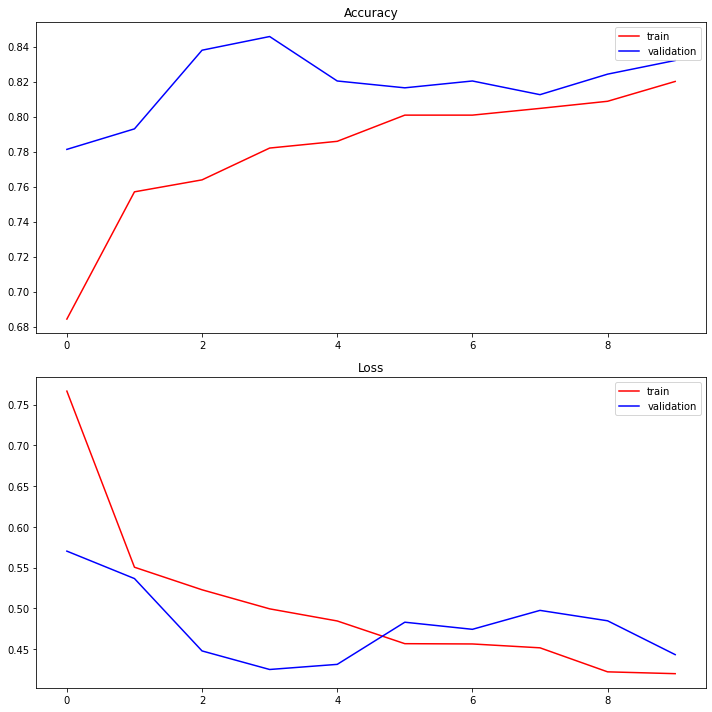

In [ ]:
plt.figure(figsize=(10,10)) # train accuracy ve validation accuracy ile train loss ve validation loss  grafiği çizdirildi.
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"],color='r',label='train')
plt.plot(history.history["val_accuracy"],color='b',label='validation')
plt.legend(loc='best')

plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"],color='r',label='train')
plt.plot(history.history["val_loss"],color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("TEST:") # model test verisiyle test edildi.
score=model1.evaluate(testGen)
print("Test Loss",score[0])
print("Test Accuracy",score[1]*100)

TEST:
624/624 [==============================] - 140s 224ms/step - loss: 1.1469 - accuracy: 0.6747
Test Loss 1.1469308137893677
Test Accuracy 67.46794581413269


In [ ]:
def plot_confusion_matrix4(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues): # confusion matris işlemleri yapıldı.

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()

    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)

    if normalize:

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
Normalized confusion matrix


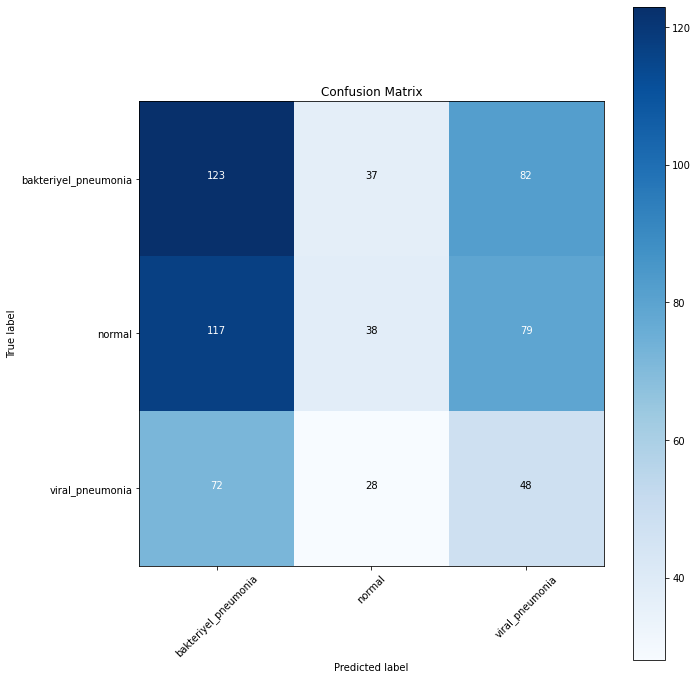

In [ ]:
target_names = [] # karmaşıklık matrisi oluşturuldu.

for key in trainGen.class_indices:

    target_names.append(key)

Y_pred = model1.predict_generator(testGen)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(testGen.classes, y_pred)

plot_confusion_matrix4(cm, target_names, title='Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion = confusion_matrix(testGen.classes, y_pred)
print('Confusion Matrix\n')
print(confusion)


print('Classification Report') # accuracy ,f1 score , recall vb değerler hesaplandı.
target_names = ['bakteriyel_pneumonia', 'normal','viral_pneumonia']
print(classification_report(testGen.classes, y_pred, target_names=target_names))

Confusion Matrix

[[123  37  82]
 [117  38  79]
 [ 72  28  48]]
Classification Report
                      precision    recall  f1-score   support

bakteriyel_pneumonia       0.39      0.51      0.44       242
              normal       0.37      0.16      0.23       234
     viral_pneumonia       0.23      0.32      0.27       148

            accuracy                           0.33       624
           macro avg       0.33      0.33      0.31       624
        weighted avg       0.35      0.33      0.32       624

